In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv')
df.shape

(45730, 10)

In [28]:
df.describe()
df.ffill(axis = 0) 
df.ffill(axis = 1)

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102.0,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39.0,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29.0,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70.0,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41.0,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84.0,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54.0,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46.0,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41.0,35.6045


In [29]:
# Creating new copies of Stratified Train and Test data
data=df.copy().drop("RMSD" , axis = 1 )
label = df["RMSD"]
#Split training set and testing set
X_train, X_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_train:", y_train.shape)
print("Shape of X_test:", y_test.shape)

Shape of X_train: (36584, 9)
Shape of X_test: (9146, 9)
Shape of X_train: (36584,)
Shape of X_test: (9146,)


In [30]:
#linear Regression model
lr = LinearRegression()
#Train Data set 
lr.fit(X_train, y_train)
#Predict test data
test_pred = lr.predict(X_test)

actual target value predicted value

9093     19.660
36713     7.759
45344    14.088
40686     7.415
39227    13.180
          ...  
524      10.962
32994    16.627
14407    17.111
28029     3.707
9308      1.433
Name: RMSD, Length: 9146, dtype: float64 [ 9.82406027  8.28403407 10.16786343 ...  8.93862728  9.05868938
  7.62695284]


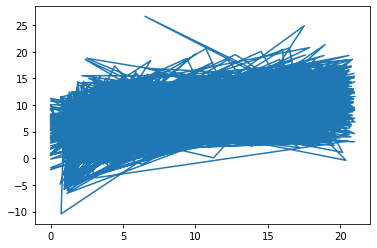

In [31]:
print("actual target value" , "predicted value\n")
print(y_test, test_pred)
plt.plot(y_test, test_pred)

In [33]:
#mean square error
test_mse = mean_squared_error(y_test, test_pred)
#mean absolute error
test_mae = mean_absolute_error(y_test,test_pred)
#root mean square error
test_rmse = np.round(np.sqrt(test_mse),2)
                     
print('Mean Absolute Error: %0.2f' % test_mse)
print('Mean Squared Error: %0.2f' % test_mae)
print('Root Mean Squared Error: %0.2f' % test_rmse)

Mean Absolute Error: 26.73
Mean Squared Error: 4.32
Root Mean Squared Error: 5.17
